In [1]:
##########################################################

In [2]:
##      Name: Srilekha Sampath kumar                    ##

In [3]:
##      Student ID: 8699606                             ##

In [4]:
##      Assignment 5: Fraud Detected Report             ##

In [5]:
##########################################################

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [7]:
CC = pd.read_excel('DataSources/CC-3Y-Transactions.xlsx')
CC['year'] = CC['Date'].dt.year
CC['Date'] = pd.to_datetime(CC.Date)

In [8]:
## Business Rule: Card type = Silver, Condition Amount exceeding 100000 for grocery Expense type is considered as Fraud transaction.

CC.loc[(CC['Card Type'] == 'Silver')& (CC['Amount'] <= 99999) & (CC['Exp Type'] == 'Grocery'), 'Fraud_Transaction'] = 'Normal'
CC.loc[(CC['Card Type'] == 'Silver')&(CC['Amount'] >= 99999) & (CC['Exp Type'] == 'Grocery'), 'Fraud_Transaction'] = 'Fraud'
CC.head(10)


,City,Date,Card Type,Exp Type,Gender,Amount,year,Fraud_Transaction
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014,NaN
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014,NaN
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014,NaN
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014,NaN
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015,NaN
5,"Delhi, India",2014-09-08,Silver,Bills,F,100036,2014,NaN
6,"Delhi, India",2015-02-24,Gold,Bills,F,143250,2015,NaN
7,"Greater Mumbai, India",2014-06-26,Platinum,Bills,F,150980,2014,NaN
8,"Delhi, India",2014-03-28,Silver,Bills,F,192247,2014,NaN
9,"Delhi, India",2014-09-01,Platinum,Bills,F,67932,2014,NaN


In [9]:
Fraud= CC.loc[CC['Fraud_Transaction'] == 'Fraud']
Fraud

,City,Date,Card Type,Exp Type,Gender,Amount,year,Fraud_Transaction
768,"Delhi, India",2014-05-25,Silver,Grocery,F,213000,2014,Fraud
772,"Greater Mumbai, India",2013-12-08,Silver,Grocery,F,183633,2013,Fraud
787,"Ahmedabad, India",2013-11-02,Silver,Grocery,F,171803,2013,Fraud
792,"Delhi, India",2015-05-05,Silver,Grocery,F,177579,2015,Fraud
793,"Greater Mumbai, India",2014-05-01,Silver,Grocery,F,230362,2014,Fraud
...,...,...,...,...,...,...,...,...
25282,"Pune, India",2015-03-23,Silver,Grocery,F,130148,2015,Fraud
25285,"Hyderabad, India",2014-03-16,Silver,Grocery,M,244490,2014,Fraud
25289,"Kanpur, India",2014-06-09,Silver,Grocery,M,299052,2014,Fraud
25292,"Kolkata, India",2014-07-15,Silver,Grocery,F,244334,2014,Fraud


In [10]:
Normal= CC.loc[CC['Fraud_Transaction'] == 'Normal']
Normal

,City,Date,Card Type,Exp Type,Gender,Amount,year,Fraud_Transaction
762,"Ahmedabad, India",2014-02-26,Silver,Grocery,F,36575,2014,Normal
780,"Bengaluru, India",2014-10-15,Silver,Grocery,F,53822,2014,Normal
814,"Delhi, India",2014-07-17,Silver,Grocery,F,46381,2014,Normal
817,"Bengaluru, India",2014-05-06,Silver,Grocery,F,82474,2014,Normal
827,"Bengaluru, India",2014-07-15,Silver,Grocery,F,34594,2014,Normal
...,...,...,...,...,...,...,...,...
25153,"Kanpur, India",2014-08-12,Silver,Grocery,F,28483,2014,Normal
25188,"Surat, India",2014-11-22,Silver,Grocery,F,15241,2014,Normal
25226,"Pune, India",2014-12-31,Silver,Grocery,F,10968,2014,Normal
25255,"Surat, India",2014-03-26,Silver,Grocery,F,57939,2014,Normal


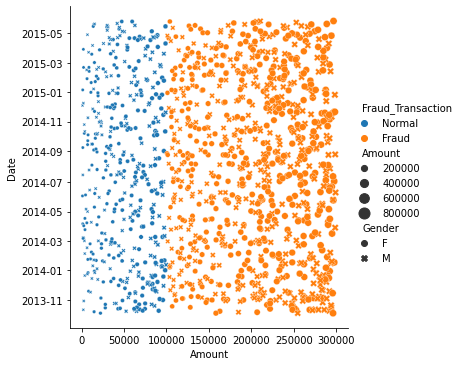

In [11]:
sns.relplot(x='Amount', y='Date', hue='Fraud_Transaction', data=CC, style="Gender", size="Amount", sizes=(10, 150))